# Station Density Profile of Washington Earthquake Early Warning Stations

## Create csv of all EEW sites

Must have the following headers:
* net
* sta
* chan
* location
* lat
* lon
* rate*

*sample rate(not required)


## Clean CSV

### Ran at following commit levels
MagD commit

magd_client commit

Remove duplicate stations since we are only concerned with spatial location

In [74]:
%run scripts/clean_csv.py -i csv/eew_density/eew_stas_current_all.csv -o csv/eew_density/eew_stas_current_clean.csv

 ## Station density

--------------------------------------------------------------------------------------------------

In [ ]:
##some constants for all plots
#path to local magd_client
magd_client_path = '/Users/joncon/Sites/magd_client/'

lat_min=43.0
lat_max=51.5
lon_min=-130.0
lon_max=-115.0
#
resolution=0.1
#number of stations to use in solution. 
num_solutions=4

#create dicts to hold grid paths
grid_paths={}

In [26]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create Grids

In [44]:
#name of config file in ./config/{name}.ini
name ="washington_current"

#current stations
%run -i scripts/make_grids.py \
--name=$name \
--grid_types=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using _grid_paths dict created by script
grid_paths[name] = _grid_paths
grid_current = get_pickle(grid_paths[name]['dist_max'])


43.0
Profiling spatially...


KeyboardInterrupt: 

KeyError: 'dist_max'

In [ ]:
#name of config file in ./config/{name}.ini
name ="washington_current_and_notional"

#current + notional stations 
%run -i scripts/make_grids.py \
--name=$name \
--grid_types=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using grid_paths dict created by script
grid_paths[name] = _grid_paths
grid_notional = get_pickle(grid_paths[name]['dist_max'])


In [36]:
# diff of notional and current
grid_diff_0 = grid_notional.copy("diff_0", "diff_0")
grid_diff_0.matrix = grid_current.matrix - grid_notional.matrix
grid_diff_0.save()
grid_diff_0_path= grid_diff_0.get_path()

### Current Density

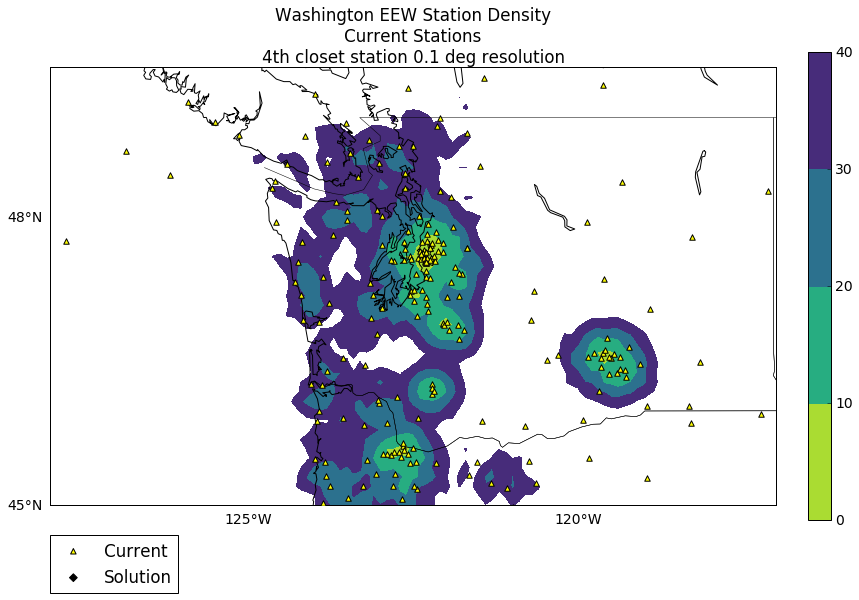

In [37]:
path=grid_paths['washington_current']['dist_max']

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=14 \
--plotstas=True \
--levels=0,10,20,30,40

### Current and Notitional Density

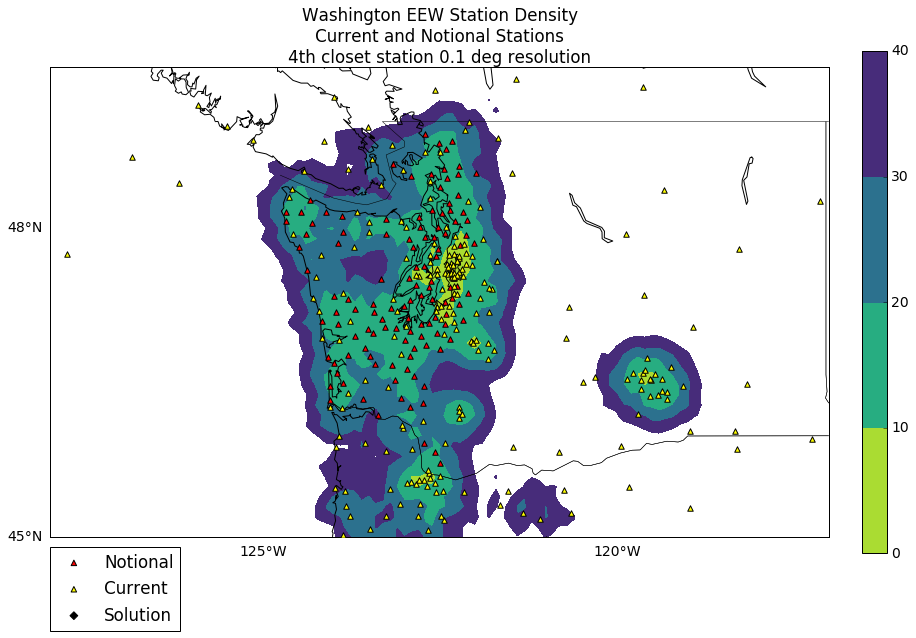

In [38]:
path=grid_paths['washington_current_and_notional']['dist_max']
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0,10,20,30,40

### Diff of Current and Notional Density

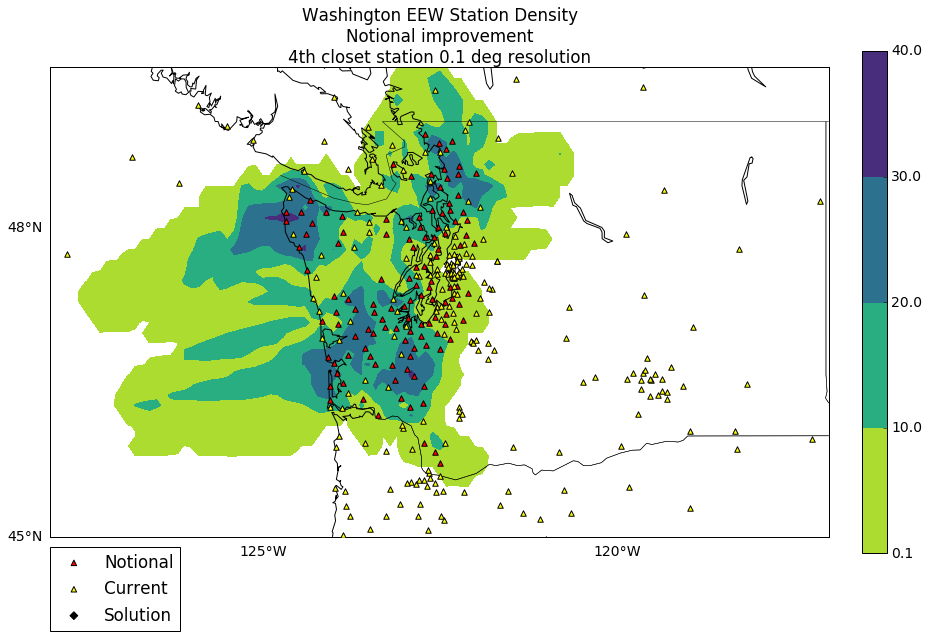

In [23]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_0_path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=15 \
--color=viridis_r \
--plotstas=True \
--levels=0.1,10,20,30,40

## Blind zone

--------------------------------------------------------------------------------------------------------------

In [24]:
velocity_p = 5.4
velocity_s = 3

#8km current
grid_blindzone8 = grid_current.copy("blindzone", "grid_blindzone8")
grid_blindzone8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_blindzone8.save()
grid_blindzone8_path = grid_blindzone8.get_path()

#8km notional
grid_notional_blindzone8 = grid_notional.copy("blindzone", "grid_notional_blindzone8")
grid_notional_blindzone8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_notional_blindzone8.save()
grid_notional_blindzone8_path = grid_notional_blindzone8.get_path()

#8km diff
grid_diff_blindzone8 = grid_notional_blindzone8.copy("blindzone", "diff_blindzone8")
grid_diff_blindzone8.matrix = grid_blindzone8.matrix - grid_notional_blindzone8.matrix
grid_diff_blindzone8.save()
grid_diff_blindzone8_path = grid_diff_blindzone8.get_path()

#20km current
grid_blindzone20 = grid_current.copy("blindzone", "grid_blindzone20")
grid_blindzone20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_blindzone20.save()
grid_blindzone20_path = grid_blindzone20.get_path()

#20km current + notional
grid_notional_blindzone20 = grid_notional.copy("blindzone", "grid_notional_blindzone20")
grid_notional_blindzone20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_notional_blindzone20.save()
grid_notional_blindzone20_path = grid_notional_blindzone20.get_path()

#20km diff
grid_diff_blindzone20 = grid_notional_blindzone20.copy("blindzone", "diff_blindzone20")
grid_diff_blindzone20.matrix = grid_blindzone20.matrix - grid_notional_blindzone20.matrix
grid_diff_blindzone20.save()
grid_diff_blindzone20_path = grid_notional_blindzone20.get_path()

#50km current
grid_blindzone50 = grid_current.copy("blindzone", "grid_blindzone50")
grid_blindzone50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_blindzone50.save()
grid_blindzone50_path = grid_blindzone50.get_path()

#50km current + notional
grid_notional_blindzone50 = grid_notional.copy("blindzone", "grid_notional_blindzone50")
grid_notional_blindzone50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_notional_blindzone50.save()
grid_notional_blindzone50_path = grid_notional_blindzone50.get_path()

#50km diff
grid_diff_blindzone50 = grid_notional_blindzone50.copy("blindzone", "diff_blindzone50")
grid_diff_blindzone50.matrix = grid_blindzone50.matrix - grid_notional_blindzone50.matrix
grid_diff_blindzone50.save()
grid_diff_blindzone50_path = grid_notional_blindzone50.get_path()

### Current Stations, Depth: 8km

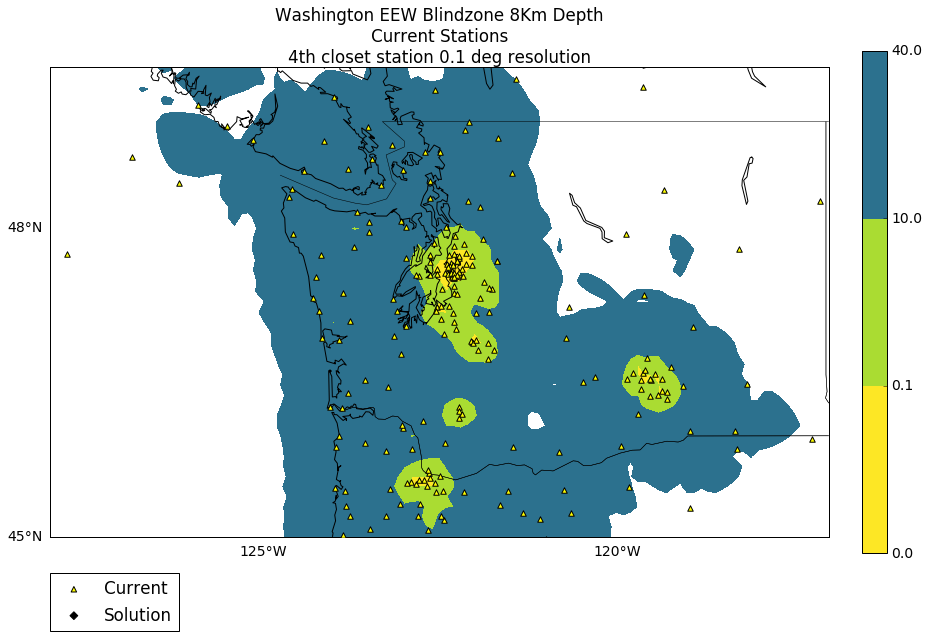

In [25]:
%run -i scripts/plot_heatmap.py \
--path=$grid_blindzone8_path \
--title1="Washington EEW Blindzone 8Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=15 \
--plotstas=True \
--color=viridis_r \
--levels=0,0.1,10,40

### Current and Notional Stations, Depth: 8km

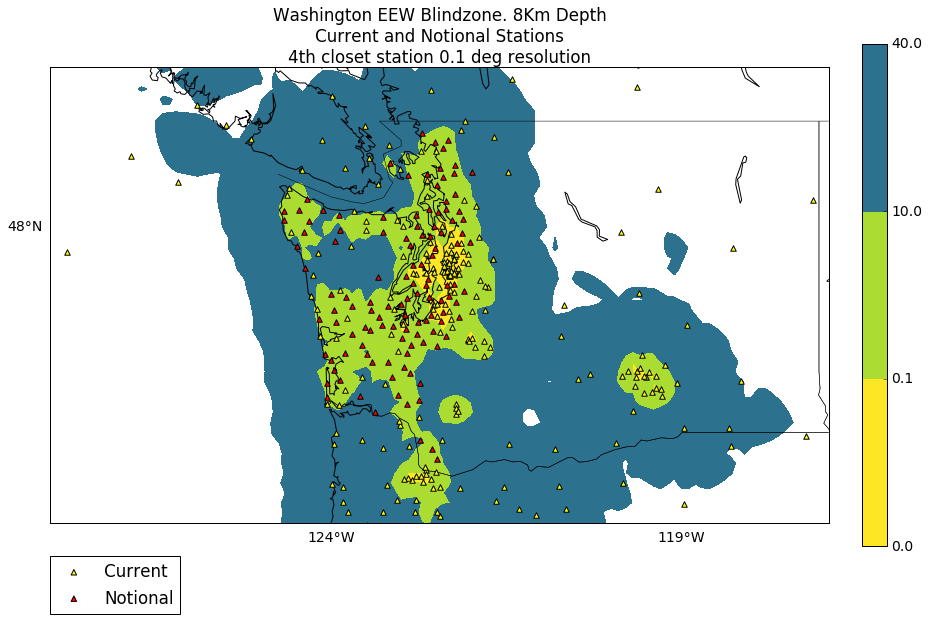

In [24]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_blindzone8_path \
--title1="Washington EEW Blindzone. 8Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,0.1,10,40

### Diff of Current and Notional Depth: 8Km

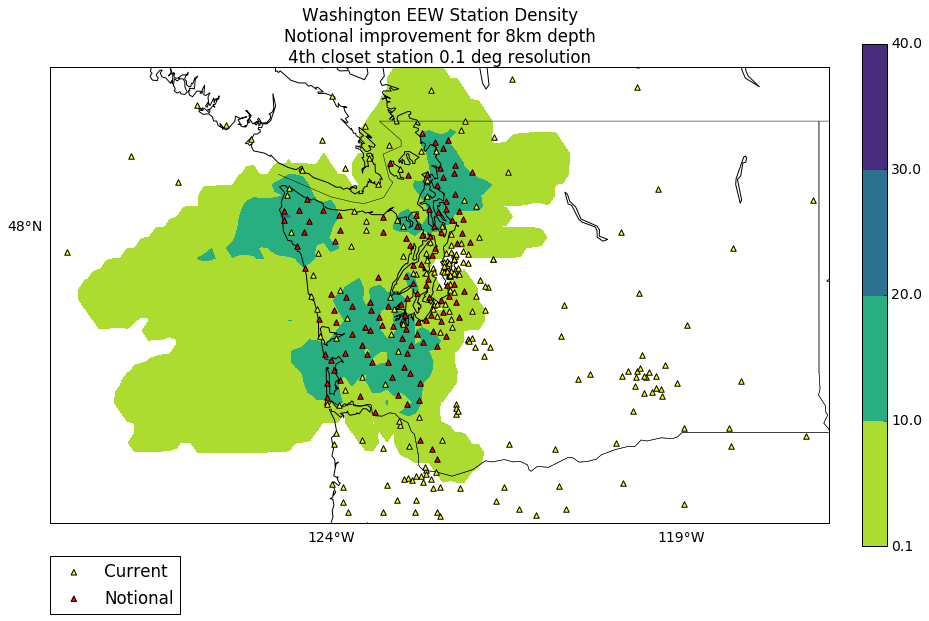

In [25]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_blindzone8_path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement for 8km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,10,20,30,40

------------------------------------------------------------------------------------------------------------------

### Current Stations, Depth: 20km

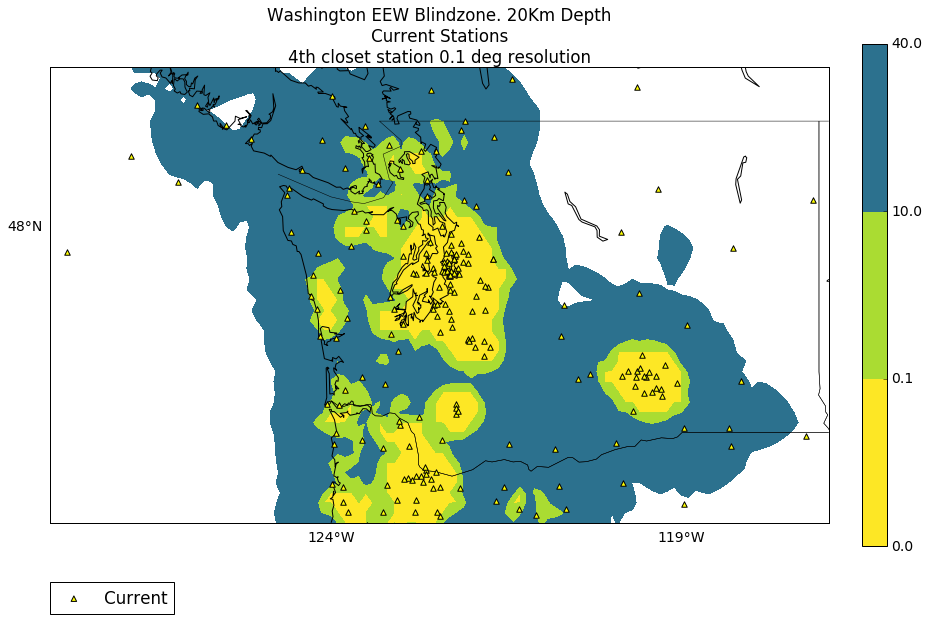

In [26]:
%run -i scripts/plot_heatmap.py \
--path=$grid_blindzone20_path \
--title1="Washington EEW Blindzone. 20Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,0.1,10,40

### Current and Notional Stations, Depth: 20km

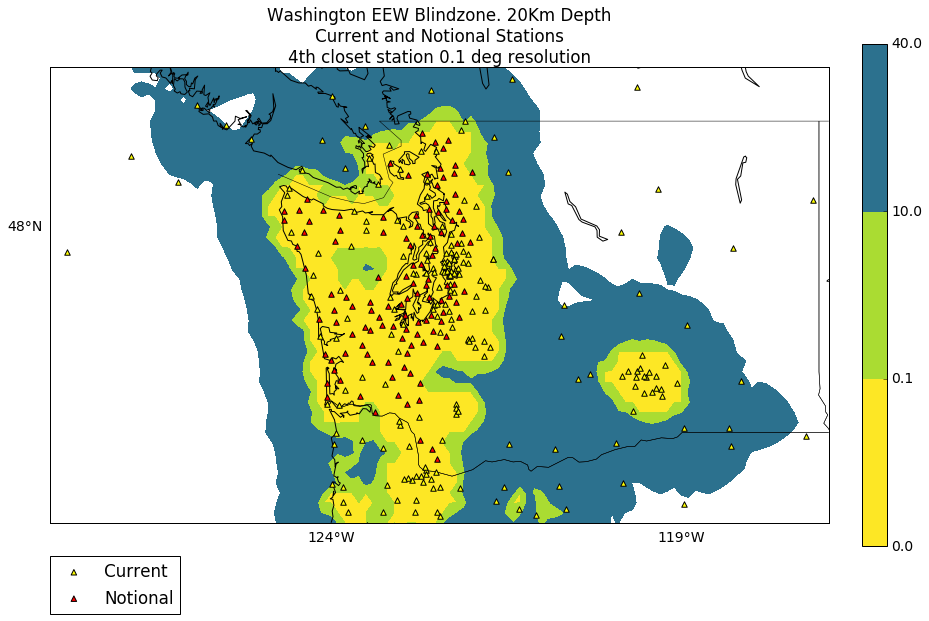

In [27]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_blindzone20_path \
--title1="Washington EEW Blindzone. 20Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,0.1,10,40

### Diff of Current and Notional Depth: 20Km

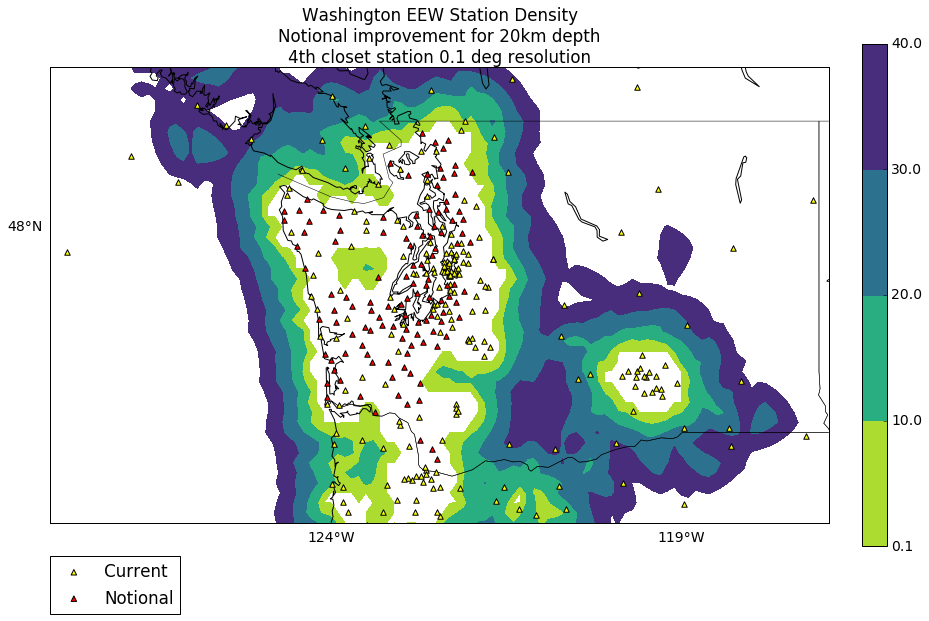

In [28]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_blindzone20_path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement for 20km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,10,20,30,40

### Current Stations, Depth: 50km

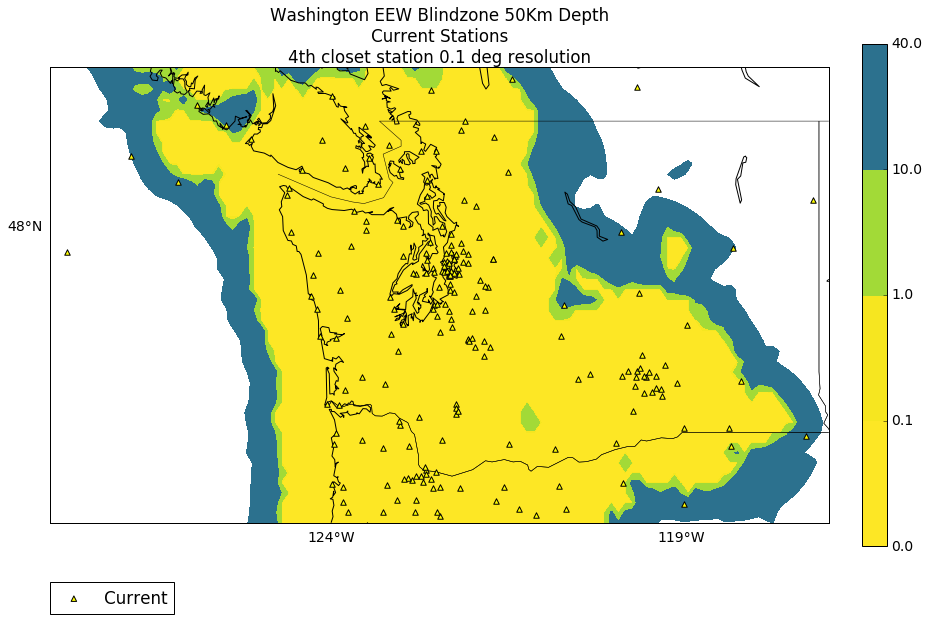

In [29]:
%run -i scripts/plot_heatmap.py \
--path=$grid_blindzone50_path \
--title1="Washington EEW Blindzone 50Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,0.1,1,10,40

### Current and Notional Stations, Depth: 20km

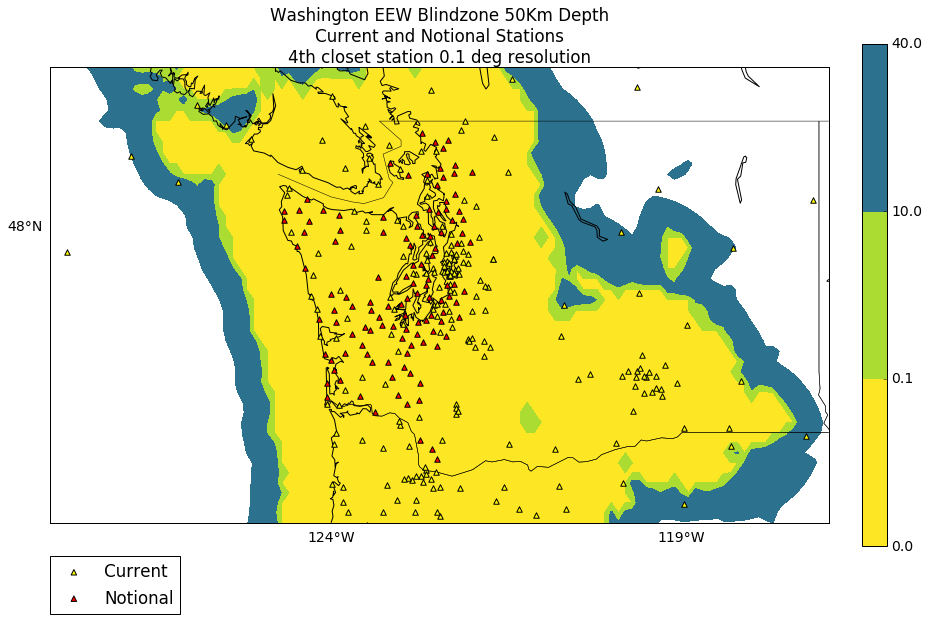

In [30]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_blindzone50_path \
--title1="Washington EEW Blindzone 50Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,0.1,10,40

### Diff of Current and Notional Depth: 50Km

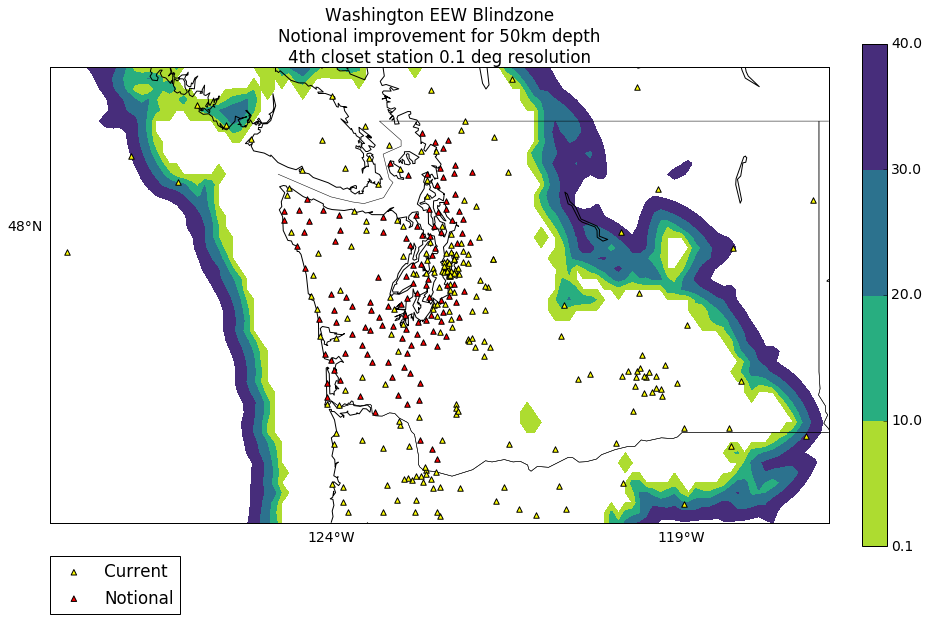

In [31]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_blindzone50_path \
--title1="Washington EEW Blindzone" \
--title2="Notional improvement for 50km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,10,20,30,40

## Trigger Time

For all origins, calculate p distance * p_velocity + processing_time(sec)

--------------------------------------------------------------------------------------------------------------

In [12]:
velocity_p = 5.4
velocity_s = 3
processing_time = 4

#8km current
grid_trigger8 = grid_current.copy("trigger", "grid_trigger8")
grid_trigger8.transform_to_trigger_time(velocity_p, processing_time, 8)
grid_trigger8.save()
grid_trigger8_path = grid_trigger8.get_path()

#8km current + notional
grid_notional_trigger8 = grid_notional.copy("trigger", "grid_notional_trigger8")
grid_notional_trigger8.transform_to_trigger_time(velocity_p, processing_time, 8)
grid_notional_trigger8.save()
grid_notional_trigger8_path = grid_notional_trigger8.get_path()

#8km diff
grid_diff_trigger8 = grid_notional_trigger8.copy("trigger", "diff_trigger8")
grid_diff_trigger8.matrix = grid_trigger8.matrix - grid_notional_trigger8.matrix
grid_diff_trigger8.save()
grid_diff_trigger8_path = grid_diff_trigger8.get_path()

#20km current
grid_trigger20 = grid_current.copy("trigger", "grid_trigger20")
grid_trigger20.transform_to_trigger_time(velocity_p, processing_time, 20)
grid_trigger20.save()
grid_trigger20_path = grid_trigger20.get_path()

#20km current + notional
grid_notional_trigger20 = grid_notional.copy("trigger", "grid_notional_trigger20")
grid_notional_trigger20.transform_to_trigger_time(velocity_p, processing_time, 20)
grid_notional_trigger20.save()
grid_notional_trigger20_path = grid_notional_trigger20.get_path()

#20km diff
grid_diff_trigger20 = grid_notional_trigger20.copy("trigger", "diff_trigger20")
grid_diff_trigger20.matrix = grid_trigger20.matrix - grid_notional_trigger20.matrix
grid_diff_trigger20.save()
grid_diff_trigger20_path = grid_diff_trigger20.get_path()

#50km current
grid_trigger50 = grid_current.copy("trigger", "grid_trigger50")
grid_trigger50.transform_to_trigger_time(velocity_p, processing_time, 50)
grid_trigger50.save()
grid_trigger50_path = grid_trigger50.get_path()

#50km current + notional
grid_notional_trigger50 = grid_notional.copy("trigger", "grid_notional_trigger50")
grid_notional_trigger50.transform_to_trigger_time(velocity_p, processing_time, 50)
grid_notional_trigger50.save()
grid_notional_trigger50_path = grid_notional_trigger50.get_path()

#50km diff
grid_diff_trigger50 = grid_notional_trigger50.copy("trigger", "diff_trigger50")
grid_diff_trigger50.matrix = grid_trigger50.matrix - grid_notional_trigger50.matrix
grid_diff_trigger50.save()
grid_diff_trigger50_path = grid_diff_trigger50.get_path()


### Current Stations, Depth: 8km

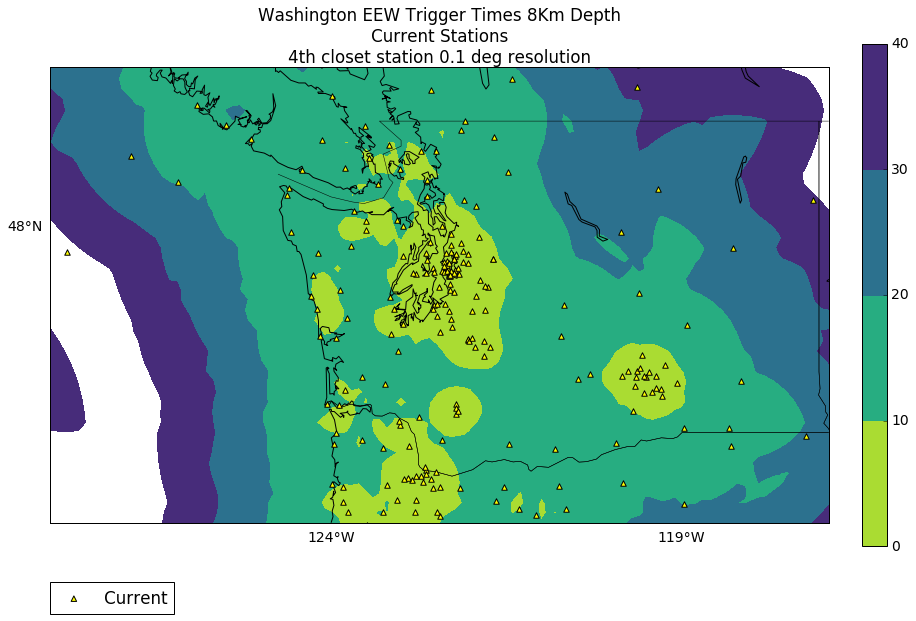

In [29]:
%run -i scripts/plot_heatmap.py \
--path=$grid_trigger8_path \
--title1="Washington EEW Trigger Times 8Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 8km

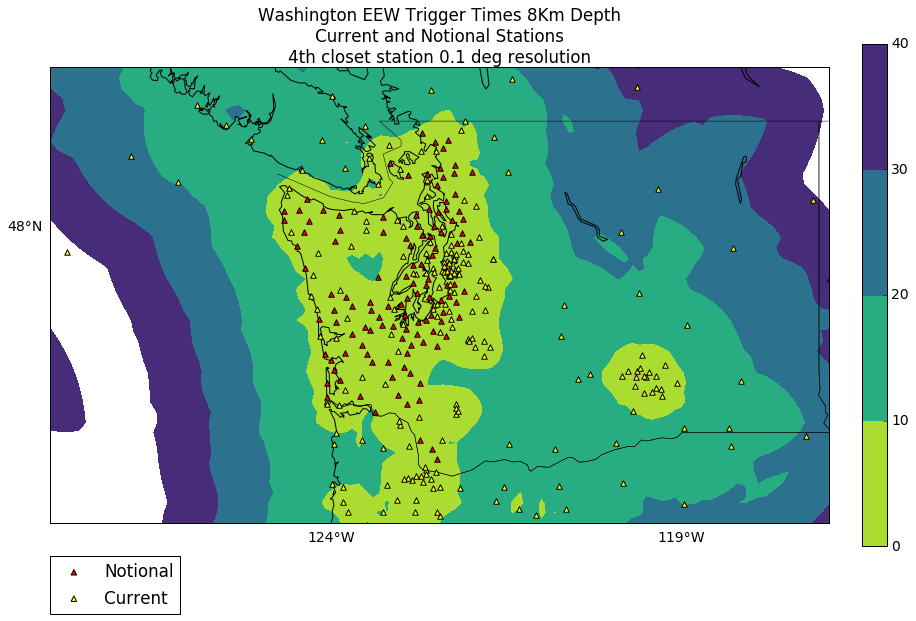

In [31]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_trigger8_path \
--title1="Washington EEW Trigger Times 8Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 8Km

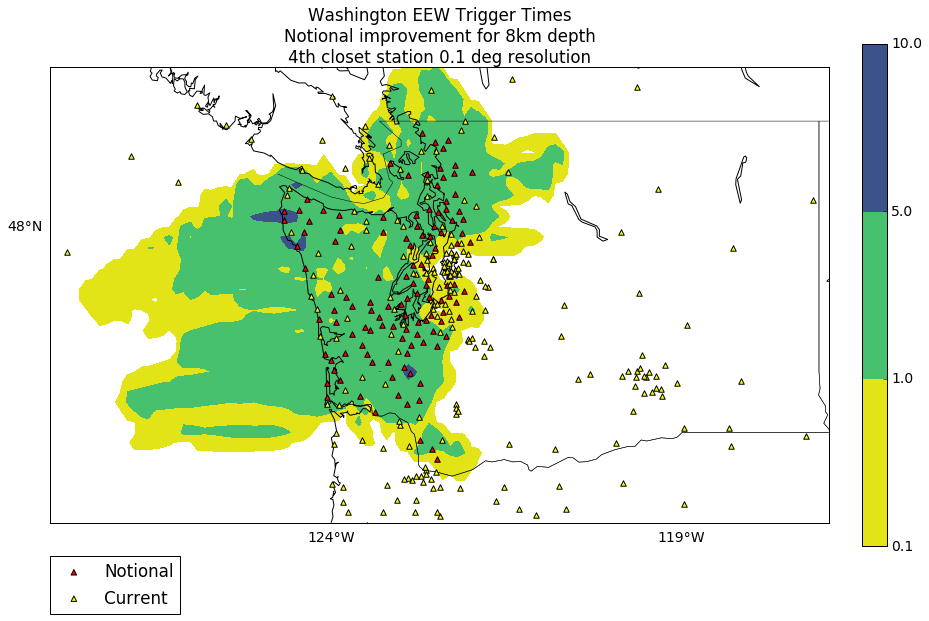

In [30]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_trigger8_path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 8km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,1,5,10

------------------------------------------------------------------------------------------------------------------

### Current Stations, Depth: 20km

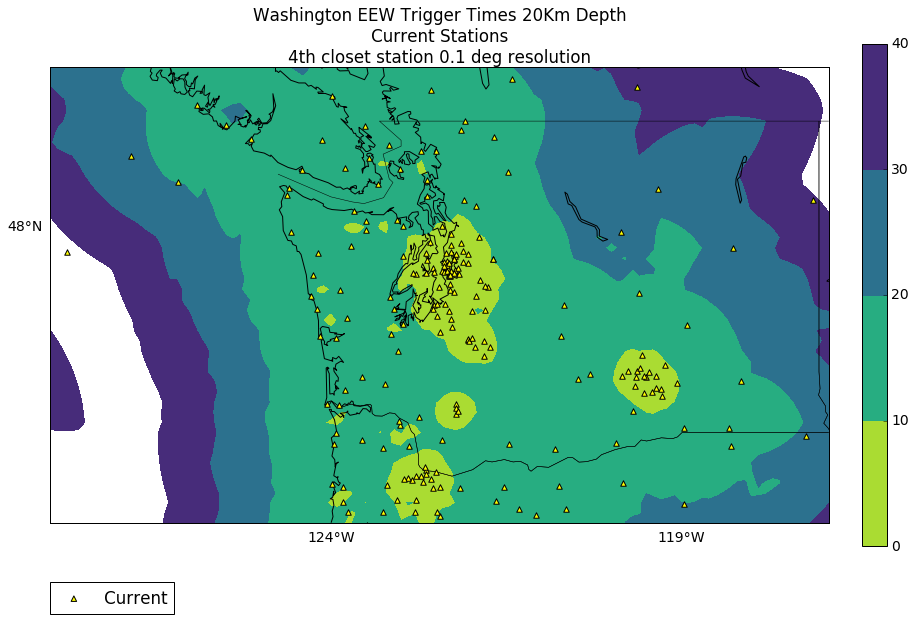

In [32]:
%run -i scripts/plot_heatmap.py \
--path=$grid_trigger20_path \
--title1="Washington EEW Trigger Times 20Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 20km

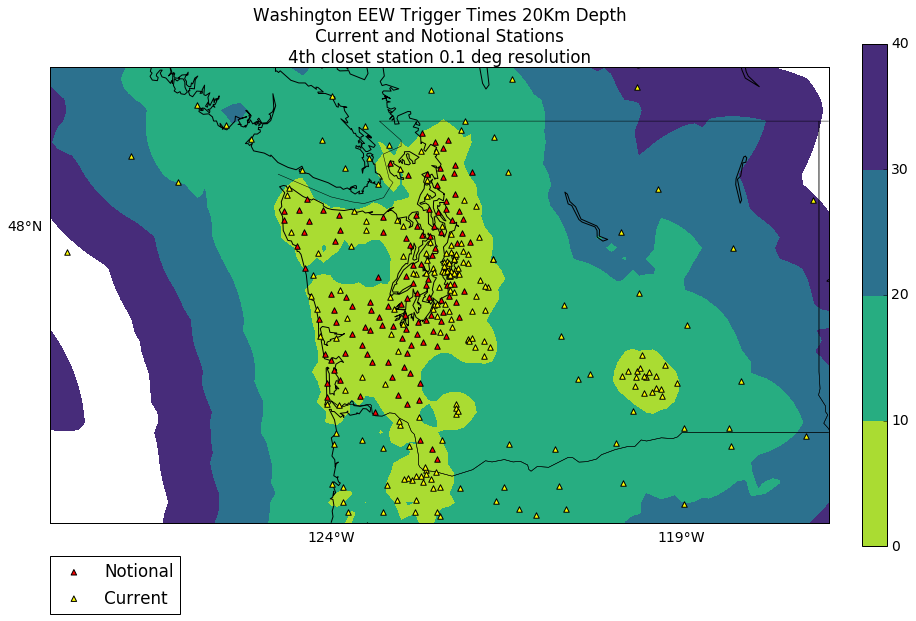

In [33]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_trigger20_path \
--title1="Washington EEW Trigger Times 20Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 20Km

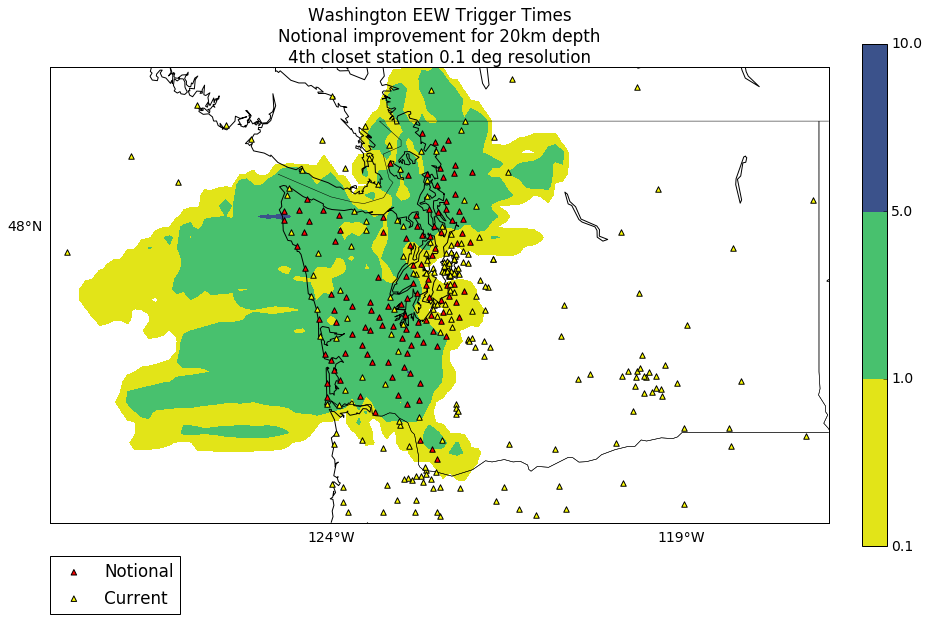

In [34]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_trigger20_path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 20km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,1,5,10

### Current Stations, Depth: 50km

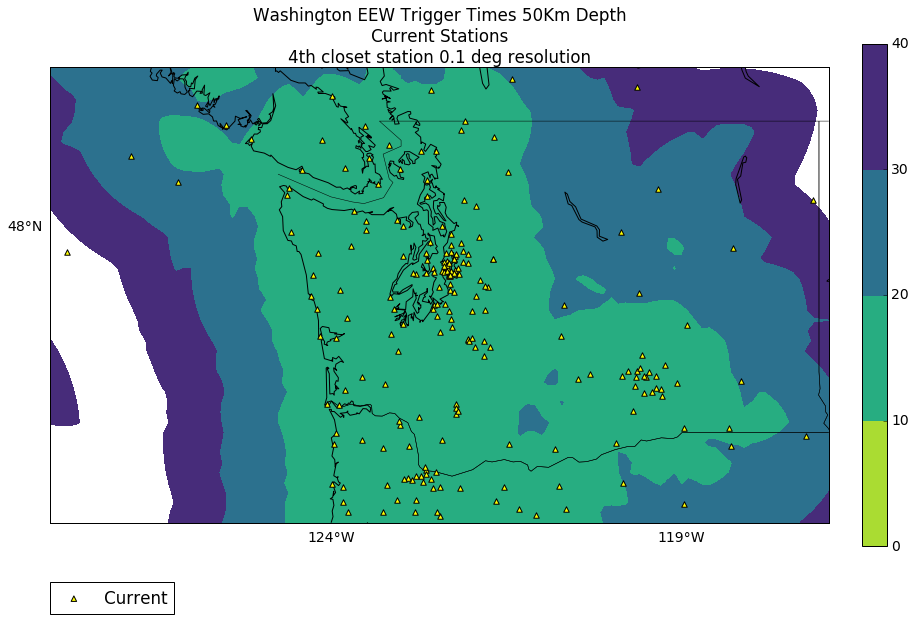

In [74]:
%run -i scripts/plot_heatmap.py \
--path=$grid_trigger50_path \
--title1="Washington EEW Trigger Times 50Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 50km

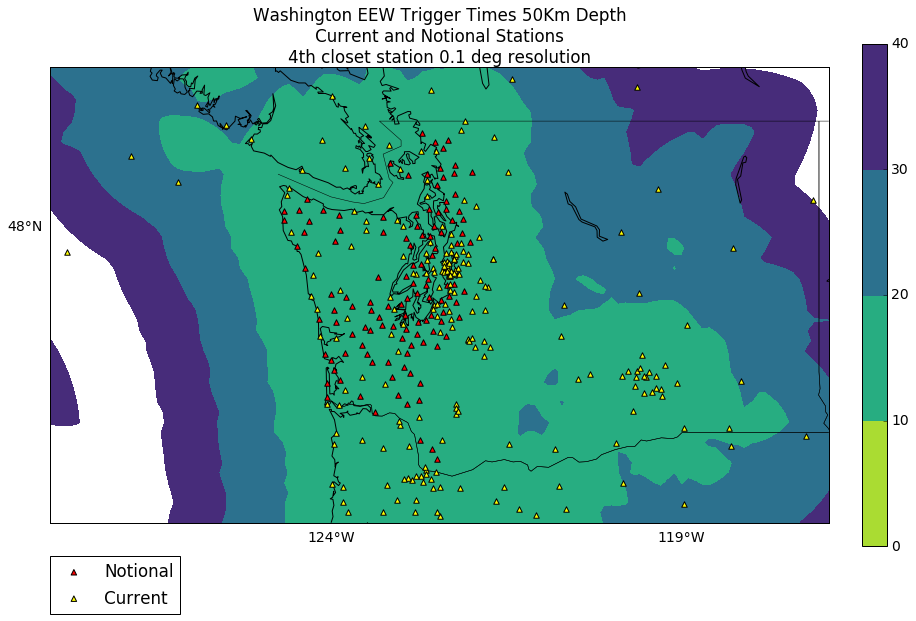

In [35]:
%run -i scripts/plot_heatmap.py \
--path=$grid_notional_trigger50_path \
--title1="Washington EEW Trigger Times 50Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 50Km

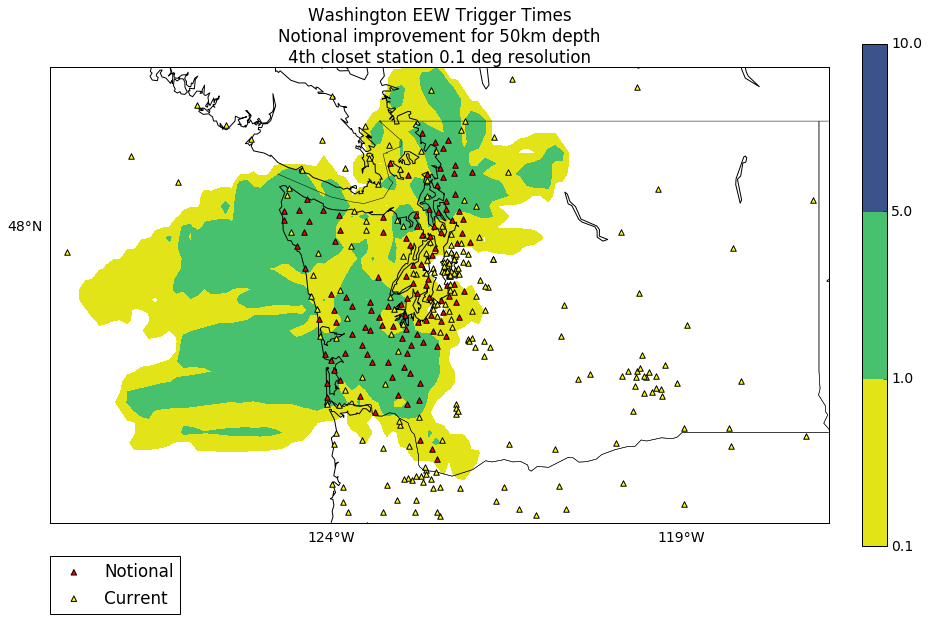

In [36]:
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_trigger50_path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 50km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--plotwidth=15 \
--plotstas=True \
--levels=0.1,1,5,10

----------------------------------------------------------------------------------------------------------------------

## Action Window

For all origins, calculate trigger time(p distance / p_velocity)+ processing_time(sec). Create second grid that calculates all epi-distances for a given location. Determine s travel time to location and subtract trigger time

In [14]:
#current stations 
%run -i scripts/make_grids.py \
--name=olympia \
--grid_types=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

Profiling spatially...
Created the following grids:
/Users/joncon/Sites/magd_client/scripts/../pickle_jar/olympia/dist_max_grid/85x150-res-0.1.pickle


In [17]:
#create grid and paths
grid_olympia_path = "./pickle_jar/olympia/dist_max_grid/85x150-res-0.1.pickle"
grid_olympia = get_pickle(grid_olympia_path)

velocity_p = 5.4
velocity_s = 3
processing_time = 4


#8km-wave travel times to Olympia
grid_olympia8_s = grid_olympia.copy("city", "grid_olympia8_s")
grid_olympia8_s.transform_to_s_travel_time(velocity_s, 8)
grid_olympia8_s.save()
grid_olympia8_s_path = grid_olympia8_s.get_path()


#20km-wave travel times to Olympia
grid_olympia20_s = grid_olympia.copy("city", "grid_olympia20_s")
grid_olympia20_s.transform_to_s_travel_time(velocity_s, 20)
grid_olympia20_s.save()
grid_olympia20_s_path = grid_olympia20_s.get_path()

#50km-wave travel times to Olympia
grid_olympia50_s = grid_olympia.copy("city", "grid_olympia50_s")
grid_olympia50_s.transform_to_s_travel_time(velocity_s, 50)
grid_olympia50_s.save()
grid_olympia50_s_path = grid_olympia50_s.get_path()

##################################################
#combine olympia grid with trigger grids
##################################################

#First combine markers from both

# 8km current warning = s_times grid - 8km trigger time grid
#need to add these stations to the olympia grid to plot
current_markers= grid_trigger8.markers
notional_markers = grid_notional_trigger8.markers
olympia_marker = grid_olympia8_s.markers

grid_olympia_warning8 = grid_olympia8_s.copy("warning", "olympia_warning8")
grid_olympia_warning8.markers =  {**olympia_marker, **current_markers}
grid_olympia_warning8.matrix = grid_olympia_warning8.matrix - grid_trigger8.matrix
grid_olympia_warning8.matrix = grid_olympia_warning8.matrix.clip(0) # set all negatives to 0
grid_olympia_warning8.save()
grid_olympia_warning8_path = grid_olympia_warning8.get_path()

# 8km current + notional warning = s_times grid - 8km trigger time grid
grid_olympia_notional_warning8 = grid_olympia8_s.copy("warning", "olympia_notional_warning8")
grid_olympia_notional_warning8.markers =  {**olympia_marker, **notional_markers}
grid_olympia_notional_warning8.matrix = grid_olympia_notional_warning8.matrix - grid_notional_trigger8.matrix
grid_olympia_notional_warning8.matrix = grid_olympia_notional_warning8.matrix.clip(0)
grid_olympia_notional_warning8.save()
grid_olympia_notional_warning8_path = grid_olympia_notional_warning8.get_path()

#8km diff

# 8km current + notional warning = s_times grid - 8km trigger time grid
grid_olympia_diff_warning8 = grid_olympia_notional_warning8.copy("warning", "olympia_diff_warning8")
grid_olympia_diff_warning8.matrix = grid_olympia_diff_warning8.matrix - grid_olympia_warning8.matrix
grid_olympia_diff_warning8.save()
grid_olympia_diff_warning8_path = grid_olympia_diff_warning8.get_path()


###################################################

# 20km current warning = s_times grid - 20km trigger time grid
grid_olympia_warning20 = grid_olympia20_s.copy("warning", "olympia_warning20")
grid_olympia_warning20.markers = {**olympia_marker, **current_markers}
grid_olympia_warning20.matrix = grid_olympia_warning20.matrix - grid_trigger20.matrix
grid_olympia_warning20.matrix = grid_olympia_warning20.matrix.clip(0)
grid_olympia_warning20.save()
grid_olympia_warning20_path = grid_olympia_warning20.get_path()

# 20km current + notional warning = s_times grid - 20km trigger time grid
grid_olympia_notional_warning20 = grid_olympia20_s.copy("warning", "olympia_notional_warning20")
grid_olympia_notional_warning20.markers = {**olympia_marker, **notional_markers}
grid_olympia_notional_warning20.matrix = grid_olympia_notional_warning20.matrix - grid_notional_trigger20.matrix
grid_olympia_notional_warning20.matrix = grid_olympia_notional_warning20.matrix.clip(0)
grid_olympia_notional_warning20.save()
grid_olympia_notional_warning20_path = grid_olympia_notional_warning20.get_path()

#20km diff

# 20km current + notional warning = s_times grid - 20km trigger time grid
grid_olympia_diff_warning20 = grid_olympia_notional_warning20.copy("warning", "olympia_diff_warning20")
grid_olympia_diff_warning20.matrix = grid_olympia_diff_warning20.matrix - grid_olympia_warning20.matrix
grid_olympia_diff_warning20.save()
grid_olympia_diff_warning20_path = grid_olympia_diff_warning20.get_path()

#####################################################

# 50km current warning = s_times grid - 50km trigger time grid
grid_olympia_warning50 = grid_olympia50_s.copy("warning", "olympia_warning50")
grid_olympia_warning50.markers = {**olympia_marker, **current_markers}
grid_olympia_warning50.matrix = grid_olympia_warning50.matrix - grid_trigger50.matrix
grid_olympia_warning50.matrix = grid_olympia_warning50.matrix.clip(0)
grid_olympia_warning50.save()
grid_olympia_warning50_path = grid_olympia_warning50.get_path()

# 50km current + notional warning = s_times grid - 50km trigger time grid
grid_olympia_notional_warning50 = grid_olympia50_s.copy("warning", "olympia_notional_warning50")
grid_olympia_notional_warning50.markers = {**olympia_marker, **notional_markers}
grid_olympia_notional_warning50.matrix = grid_olympia_notional_warning50.matrix - grid_notional_trigger50.matrix
grid_olympia_notional_warning50.matrix = grid_olympia_notional_warning50.matrix.clip(0)
grid_olympia_notional_warning50.save()
grid_olympia_notional_warning50_path = grid_olympia_notional_warning50.get_path()

#50km diff

# 50km current + notional warning = s_times grid - 50km trigger time grid
grid_olympia_diff_warning50 = grid_olympia_notional_warning50.copy("warning", "olympia_diff_warning50")
grid_olympia_diff_warning50.matrix = grid_olympia_diff_warning50.matrix - grid_olympia_warning50.matrix
grid_olympia_diff_warning50.save()
grid_olympia_diff_warning50_path = grid_olympia_diff_warning50.get_path()



### Current Stations, Depth: 8km

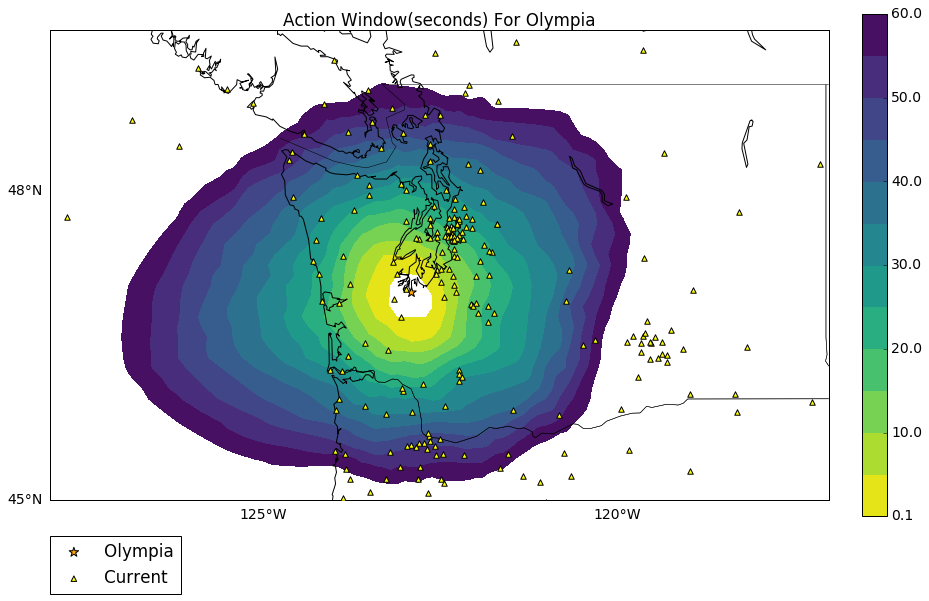

In [18]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_warning8_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Current and Notional Stations, Depth: 8km

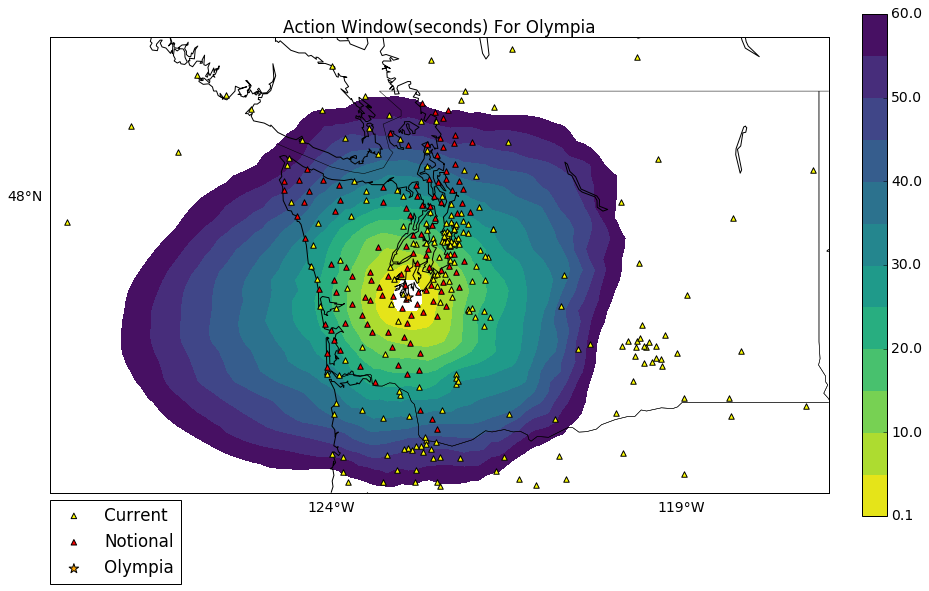

In [67]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_notional_warning8_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Diff of Current and Notional Depth: 8Km

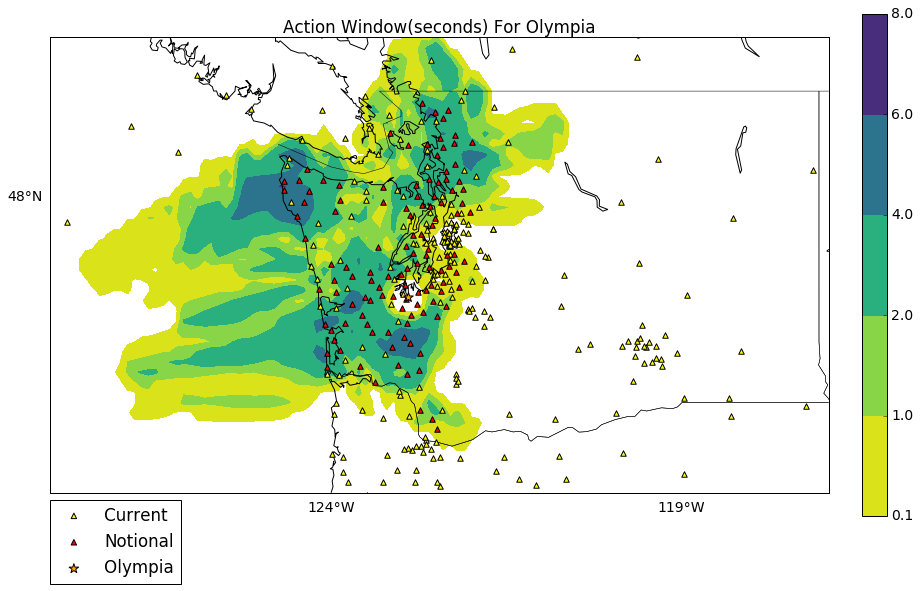

In [68]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_diff_warning8_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,1,2,4,6,8

------------------------------------------------------------------------------------------------------------------

### Current Stations, Depth: 20km

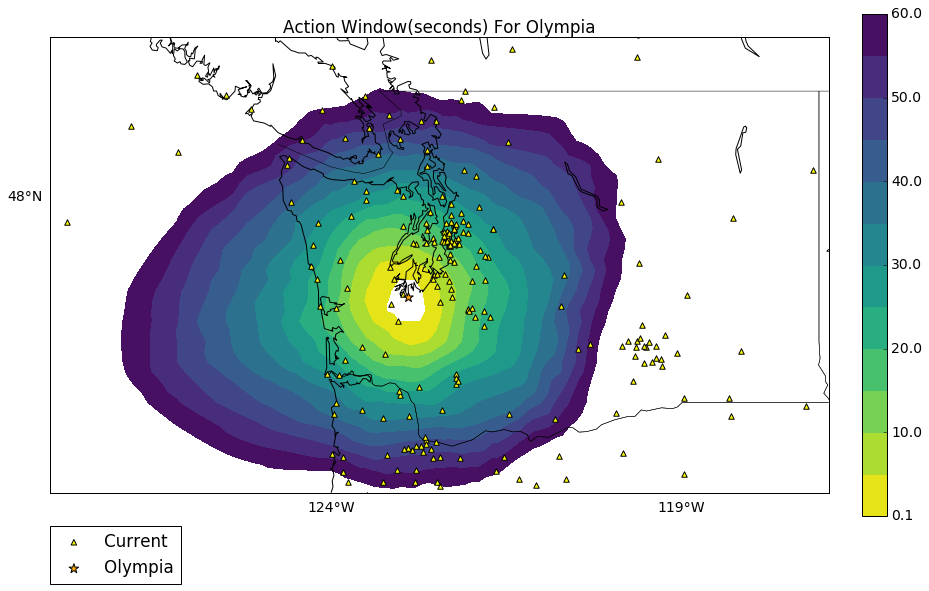

In [69]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_warning20_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Current and Notional Stations, Depth: 20km

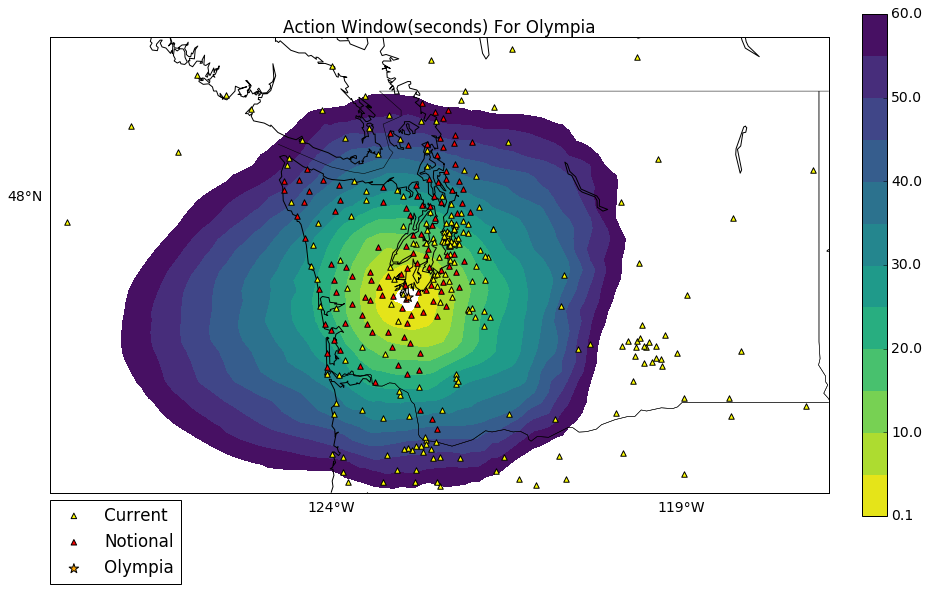

In [70]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_notional_warning20_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Diff of Current and Notional Depth: 20Km

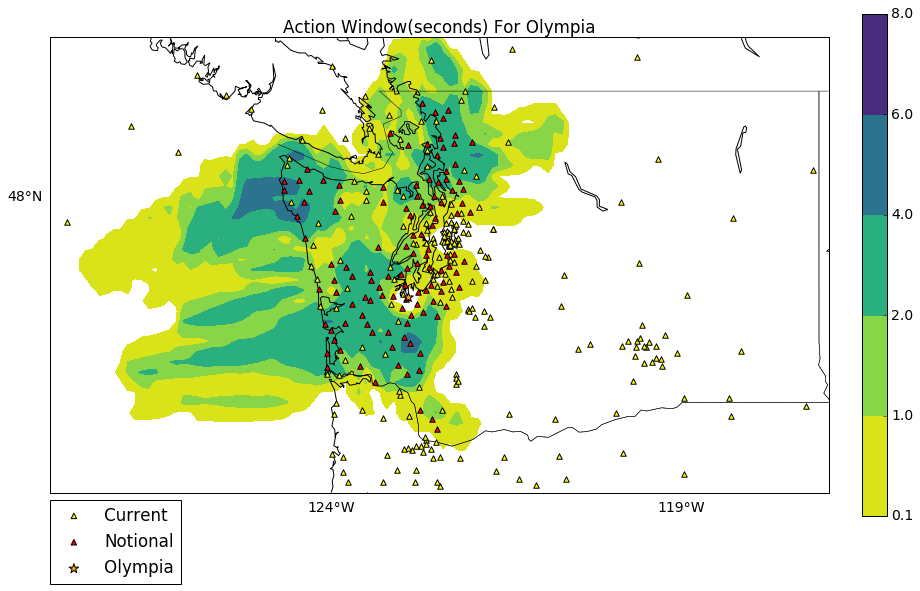

In [71]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_diff_warning20_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,1,2,4,6,8

### Current Stations, Depth: 50km

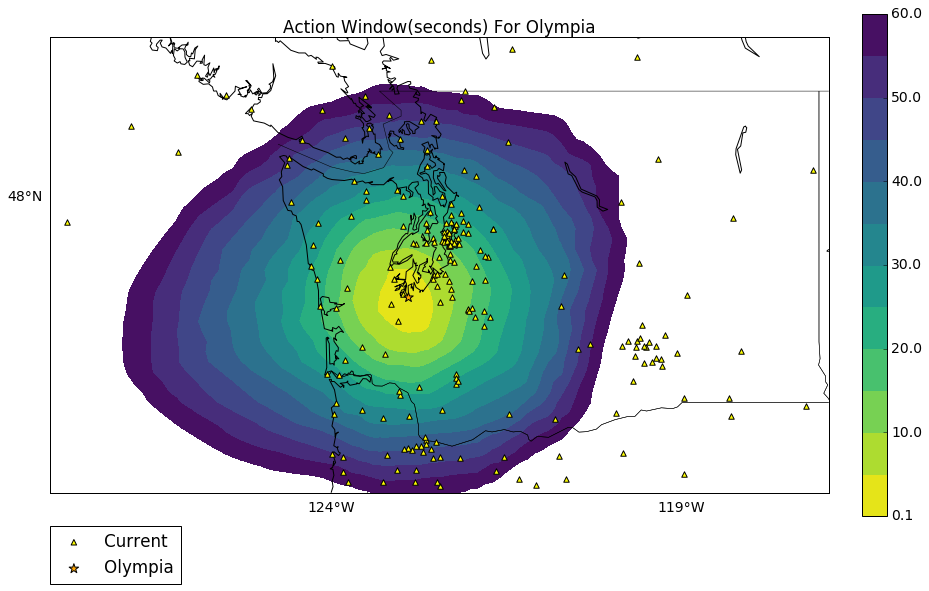

In [75]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_warning50_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Current and Notional Stations, Depth: 50km

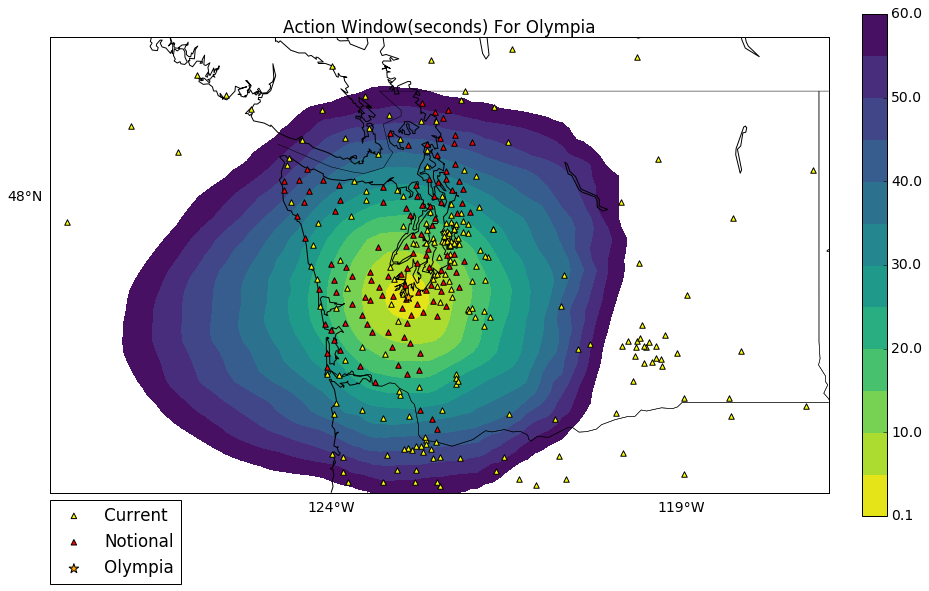

In [78]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_notional_warning50_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,5,10,15,20,25,30,35,40,45,50,55,60

### Diff of Current and Notional Depth: 50Km

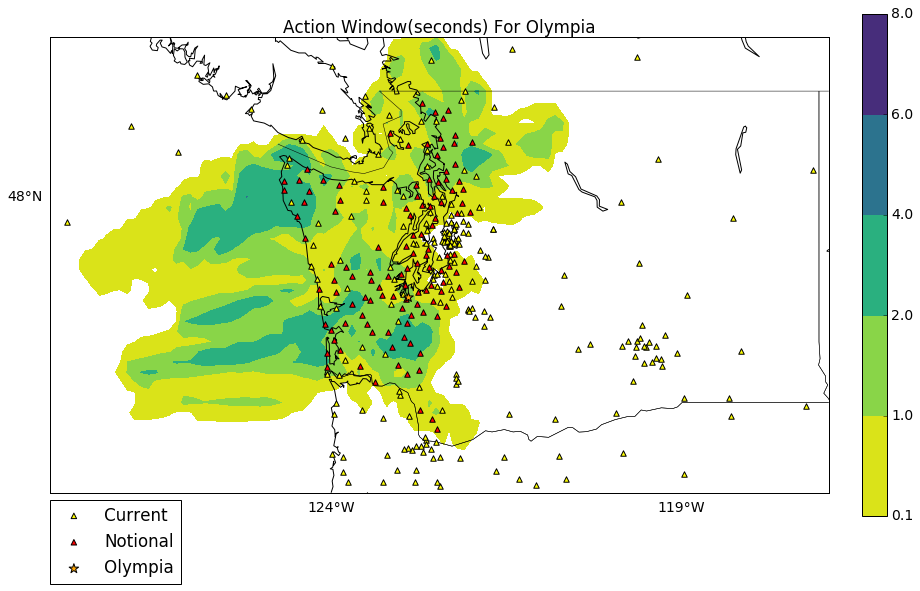

In [77]:
%run -i scripts/plot_heatmap.py \
--path=$grid_olympia_diff_warning50_path \
--title1="Action Window(seconds) For Olympia" \
--plotstas=True \
--plotwidth=15 \
--color=viridis_r \
--levels=0.1,1,2,4,6,8